# Intro to TensorFlow 2.0

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [17]:
# This is the same code to generate the random data from our previous Basic NN notebook.
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))

inputs = np.column_stack((xs, zs))

noise = np.random.uniform(low=-1, high=1, size=(observations, 1))

targets = 2*xs - 3*zs + 5 + noise       # This is the model we want the algorithm to figure out

In [18]:
# Problem is, TensorFlow only wants data in terms of tensors:
np.savez('TF_Intro', inputs=inputs, targets=targets)

Note that the np.savez stores a .npz file, which is numpy's file type used to store an N-Dimensional array, or in our case the tensor in which our data is stored.

In [19]:
training_data = np.load('TF_Intro.npz')

In [20]:
inputSize = 2
outputSize = 1

model = tf.keras.Sequential([   # TF 2.0 is based on keras, while the .Sequential() specifies how the model will be laid down
    # Note that this is a 'stack layer'

    # Takes the inputs provided and calculates the dot product of the inputs and the weights, then adds the bias
    tf.keras.layers.Dense(outputSize,
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                          )
    # Essentially, the above line is a replacement for the manual code we wrote before
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# We now have the model and the data, we need the objective function and the optimization algorithm
model.compile(optimizer=custom_optimizer, loss='mean_squared_error') # .compile() configures the model for training
# The optimizer algorithm is chosen, the loss function is the same as the average L2-Norm

# Now, we must simply fit the model with the data'
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)    # Epochs means the number of iterations
# Verbose means how much is printed out while the model is being trained

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 85.6437   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 1.7643
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.5138
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.4066
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.3583
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.3840
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.3756
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.3806
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.3610
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.3722
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 0.3923
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.4134
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.3648
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.4571
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

## Extracting the information

In [21]:
model.layers[0].get_weights()

[array([[ 1.9523383],
        [-2.9887216]], dtype=float32),
 array([4.9657383], dtype=float32)]

In [22]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

In [23]:
# Now, we need to get the outputs from our model to later on compare with our targets
model.predict_on_batch(training_data['inputs'])

array([[ 1.21189737e+01],
       [-1.19287443e+00],
       [-2.57505894e+01],
       [-1.70513668e+01],
       [-3.55013275e+01],
       [ 1.64809914e+01],
       [ 1.02778988e+01],
       [ 1.28660746e+01],
       [ 3.60316849e+01],
       [ 4.25781107e+00],
       [ 2.95998402e+01],
       [-1.20280361e+01],
       [ 1.08294220e+01],
       [ 1.97950821e+01],
       [-1.34161205e+01],
       [ 1.58878708e+00],
       [ 3.30962791e+01],
       [ 1.07642365e+01],
       [-1.96752071e+01],
       [-2.53046970e+01],
       [-1.74477119e+01],
       [-1.26440334e+01],
       [ 1.47182922e+01],
       [-2.14222221e+01],
       [-6.08390999e+00],
       [-6.09947205e-01],
       [ 1.44207020e+01],
       [-5.70642948e+00],
       [ 3.76931229e+01],
       [-4.35910225e+00],
       [ 2.03253136e+01],
       [ 2.09212742e+01],
       [-1.59384098e+01],
       [ 2.32081661e+01],
       [-1.40465260e+01],
       [ 4.09766388e+01],
       [ 2.75034389e+01],
       [ 3.13175411e+01],
       [ 2.3

In [24]:
training_data['targets'].round(1)

array([[ 12.9],
       [ -0.3],
       [-26.6],
       [-16.3],
       [-36.3],
       [ 16.3],
       [  9.9],
       [ 12.4],
       [ 37.3],
       [  5.1],
       [ 29.2],
       [-11.7],
       [ 10.4],
       [ 20.5],
       [-13.1],
       [  0.6],
       [ 32.5],
       [ 11.1],
       [-20.5],
       [-26.1],
       [-17.6],
       [-12.1],
       [ 13.9],
       [-21.1],
       [ -6. ],
       [ -0.6],
       [ 14.9],
       [ -6. ],
       [ 38. ],
       [ -3.4],
       [ 19.5],
       [ 19.9],
       [-16. ],
       [ 23.1],
       [-15.2],
       [ 41.6],
       [ 27. ],
       [ 30.6],
       [  2.5],
       [ 32.7],
       [ 20.8],
       [ 14.9],
       [ 46.1],
       [ 31.8],
       [-18.9],
       [-11.8],
       [ -1. ],
       [-24.6],
       [-36. ],
       [ -1.8],
       [-11.3],
       [  1.6],
       [-12.4],
       [  4.7],
       [-15.8],
       [-19.6],
       [ -7.6],
       [  7.7],
       [-12.2],
       [ 29.4],
       [ 44.4],
       [-35.5],
       [

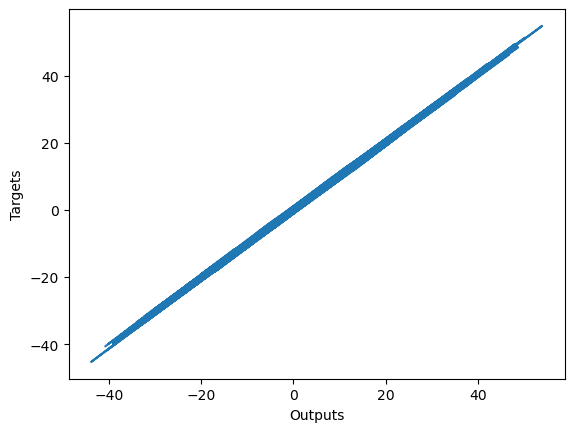

In [25]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()

Pretty close to a straight line through origin; hence, our model is pretty accurate.